In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pickle

In [2]:
heart_dataset = pd.read_csv("https://raw.githubusercontent.com/sazzad15-1779/Datasets/master/heart%20disease/heart_dataset_1.csv")
print (heart_dataset.head())
print (heart_dataset.shape)

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]
(1025, 14)


In [3]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
def print_unique_values(df):
    for column in df:
        print( f'{column} : {df[column].unique()}')
        
print_unique_values(heart_dataset)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

In [5]:
#using sklearn to get everything between 0 and 1
from sklearn.preprocessing import MinMaxScaler
dataset = heart_dataset.copy()
scaler = MinMaxScaler()
data = dataset.drop("target", axis = "columns")
target = dataset["target"]
data = scaler.fit_transform(data)

In [6]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.2,random_state =42)
print (len(data_train))

820


In [7]:
data_train, data_valid, target_train, target_valid = train_test_split(data, target, test_size=0.20, shuffle= True)
print("The shape of X_train is      ", data_train.shape)
print("The shape of X_test is       ",data_test.shape)
print("The shape of y_train is      ",target_train.shape)
print("The shape of y_test is       ",target_test.shape)
print("The shape of Y_valid is      ", target_valid.shape)
print("The shape of X_valid is       ",data_valid.shape)

The shape of X_train is       (820, 13)
The shape of X_test is        (205, 13)
The shape of y_train is       (820,)
The shape of y_test is        (205,)
The shape of Y_valid is       (205,)
The shape of X_valid is        (205, 13)


In [8]:
#making model ANN using tensorflow
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(150, input_shape = (820,13), activation = "relu"))#hidden layer with 300 neurons with relu activation15
model.add(keras.layers.Dense(75, activation = "relu")) #hidden layer with 100 neurons with relu activation
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [9]:
#model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 820, 150)          2100      
_________________________________________________________________
dense_1 (Dense)              (None, 820, 75)           11325     
_________________________________________________________________
dense_2 (Dense)              (None, 820, 1)            76        
Total params: 13,501
Trainable params: 13,501
Non-trainable params: 0
_________________________________________________________________


In [10]:
#making model ANN using tensorflow
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(150, input_shape = (820,13), activation = "relu"))#hidden layer with 300 neurons with relu activation15
model1.add(keras.layers.Dense(75, activation = "relu"))
model1.add(keras.layers.Dense(70, activation = "relu"))
model1.add(keras.layers.Dense(75, activation = "relu"))
model1.add(keras.layers.Dense(1, activation = "sigmoid"))

In [11]:
#model summary 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 820, 150)          2100      
_________________________________________________________________
dense_4 (Dense)              (None, 820, 75)           11325     
_________________________________________________________________
dense_5 (Dense)              (None, 820, 70)           5320      
_________________________________________________________________
dense_6 (Dense)              (None, 820, 75)           5325      
_________________________________________________________________
dense_7 (Dense)              (None, 820, 1)            76        
Total params: 24,146
Trainable params: 24,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
#logs for tensorboard 
import os

root_logdir = os.path.join(os.curdir, "my_logs")
print(os.path)
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()
print(run_logdir)

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>
./my_logs/run_2021_09_27-02_15_47


In [13]:
#optimizer Adam with particular hyperparameter 
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001)

In [14]:
#compiling model
model.compile(optimizer=optimizer,
             loss = "binary_crossentropy",
             metrics= ["accuracy"])
early_stopping_nn = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_nn = keras.callbacks.TensorBoard( log_dir = run_logdir, histogram_freq=1)
heart_model = model.fit(data_train, target_train, epochs= 100, validation_data = (data_valid,  target_valid), callbacks= [early_stopping_nn, tensorboard_nn])

Epoch 1/100
26/26 [==============================] - 1s 12ms/step - loss: 0.5970 - accuracy: 0.7183 - val_loss: 0.4971 - val_accuracy: 0.8000
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.8146 - val_loss: 0.3980 - val_accuracy: 0.8195
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8293 - val_loss: 0.3638 - val_accuracy: 0.8341
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8500 - val_loss: 0.3449 - val_accuracy: 0.8439
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8549 - val_loss: 0.3666 - val_accuracy: 0.8341
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3443 - accuracy: 0.8622 - val_loss: 0.3293 - val_accuracy: 0.8537
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8671 - val_loss: 0.3291 - val_accuracy: 0.8488
Epoch 8/100


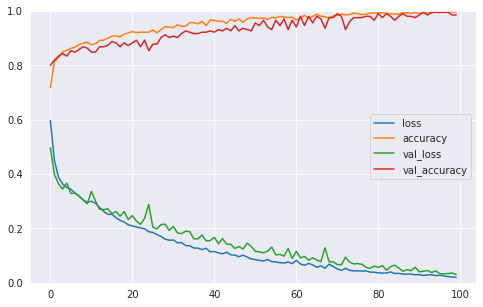

In [15]:
#plot graphs from model history
sns.set_style("darkgrid",)
pd.DataFrame(heart_model.history).plot (figsize = (8,5))
#plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
#bias vs variance
#Roc precision curve
#random,decision,knn
#model visualization
#validation curve

In [17]:
#evaluating on test dataset
model.evaluate(data_test, target_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9902


[0.02730792947113514, 0.9902439117431641]

In [18]:

pred =model.predict(data_valid)
pred,target_valid



(array([[9.9997246e-01],
        [1.8786114e-01],
        [1.5985976e-13],
        [9.8545253e-02],
        [9.7818172e-01],
        [7.1490192e-01],
        [9.9979877e-01],
        [3.9791377e-08],
        [9.9996948e-01],
        [9.9999636e-01],
        [4.8105106e-01],
        [2.0794565e-05],
        [9.9998838e-01],
        [3.7772280e-01],
        [9.9411809e-01],
        [4.3959141e-02],
        [1.6067982e-02],
        [9.9908769e-01],
        [9.9965847e-01],
        [8.2784325e-14],
        [1.3866042e-09],
        [9.9942875e-01],
        [7.7771887e-08],
        [4.1248918e-02],
        [9.8345208e-01],
        [9.9984396e-01],
        [9.9801195e-01],
        [9.9997407e-01],
        [2.9799196e-07],
        [5.9557855e-03],
        [8.3427737e-10],
        [4.0355504e-02],
        [9.8990178e-01],
        [9.9824333e-01],
        [9.9971217e-01],
        [8.8937730e-02],
        [1.8786114e-01],
        [5.5451602e-02],
        [9.9886453e-01],
        [9.9997020e-01],


In [19]:
#comparing results with predictions
y_predictions = model.predict(data_test).reshape(-1)
print (y_predictions[:5])
y_predictions = np.round(y_predictions)

[9.9996895e-01 9.9956161e-01 3.6405836e-09 9.9997413e-01 1.9634869e-09]


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print( classification_report(y_predictions, target_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       104
         1.0       0.98      1.00      0.99       101

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



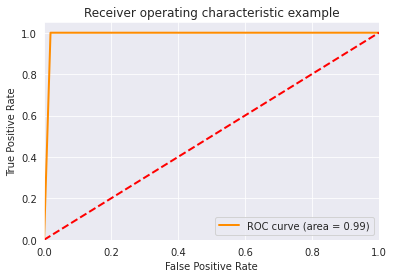

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_predictions, target_test)
roc_auc = auc(fpr, tpr)
#plotting the roc curve 

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()